Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-209.981,-219.613,1.65335e-62
2,140.151,4.0,-207.297,-216.914,2.45676e-61
3,140.302,4.0,-204.641,-214.244,3.54813e-60
4,140.452,4.0,-202.014,-211.602,4.98051e-59
5,140.603,4.0,-199.414,-208.989,6.79494e-58
6,140.754,4.0,-196.844,-206.404,9.01021e-57
7,140.905,4.0,-194.301,-203.848,1.16124e-55
8,141.055,4.0,-191.788,-201.32,1.45461e-54
9,141.206,4.0,-189.302,-198.821,1.77097e-53


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,153.266,7.05528,-69.1553,-77.7467,0.676257
2,157.94,6.89447,-71.7687,-80.0985,0.0643805
3,157.789,7.37688,-71.0557,-79.393,0.130356
4,155.377,5.44724,-71.9119,-80.3784,0.0486612
5,157.789,8.26131,-70.7446,-79.082,0.177916
6,153.266,9.62814,-69.9556,-78.547,0.303781
7,155.98,9.30653,-69.9076,-78.3404,0.373467
8,151.307,8.0201,-70.3122,-79.0296,0.187482
9,155.377,7.29648,-69.0679,-77.5343,0.836249


### Snippet 4.23

Density of sigma

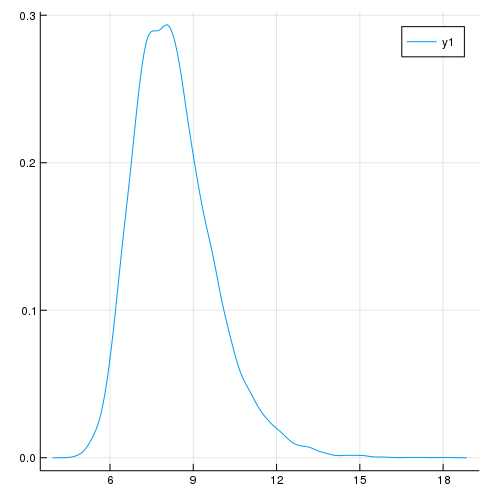

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*